# Final Year Project: Digital Makeup

------

#### Description :
Design and implement state-of-the-art machine learning algorithms to develop a digital makeup algorithm, that can significantly reduce the time/efforts to polish the facial images.

------
**Color Transfer Algorithm**:<br>
1. Reinhard Color Transfer ALgorithm
**Semantic Segmentation Models Used**:<br>
1. BiSeNet from this [repo](https://github.com/zllrunning/face-parsing.PyTorch) 
2. SCANet from this [repo](https://github.com/Seungeun-Han/SCANet_Real-Time_Face_Parsing_Using_Spatial_and_Channel_Attention)

------
Author: Chua Zi Jian<br>
Date: 31/1/2024<br>

#### 1. Import Required Library

In [1]:
# Library used
import cv2

In [2]:
# Utility Script
from bisenet_segmentation import evaluate_bisenet
from scanet_segmentation import evaluate_scanet
from crop import crop 
from reinhard_color_transfer import color_transfer_method
from merge import merge

#### 2. Initialize folder path

In [3]:
# Variables
anno_mask_path = './image_folder/anno_mask_img/'
img_folder_path = './image_folder/test-img/'
crop_save_path = './image_folder/crop_facial_parts/'
res_save_path = './image_folder/res-img/result.png'
source_img_name = '6' 
dest_img_name = '5'

### Color Transfer Experiment
------
Reinhard Color Transfer Algorithm Flowchart
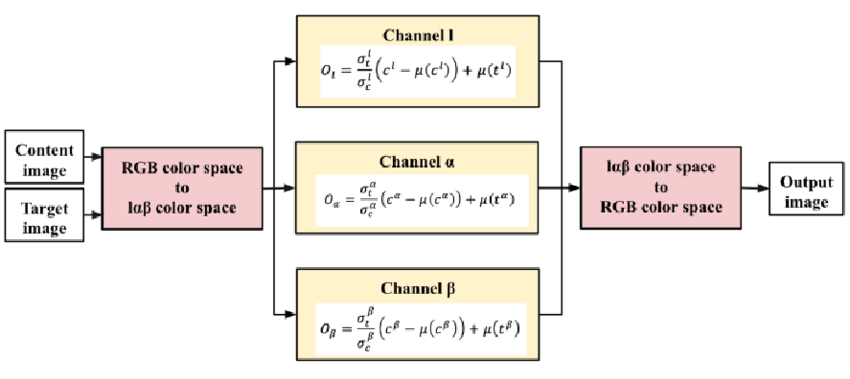

***NOTE: In our project, we won't be converting the images color space to ℓαβ and use RGB color space instead***


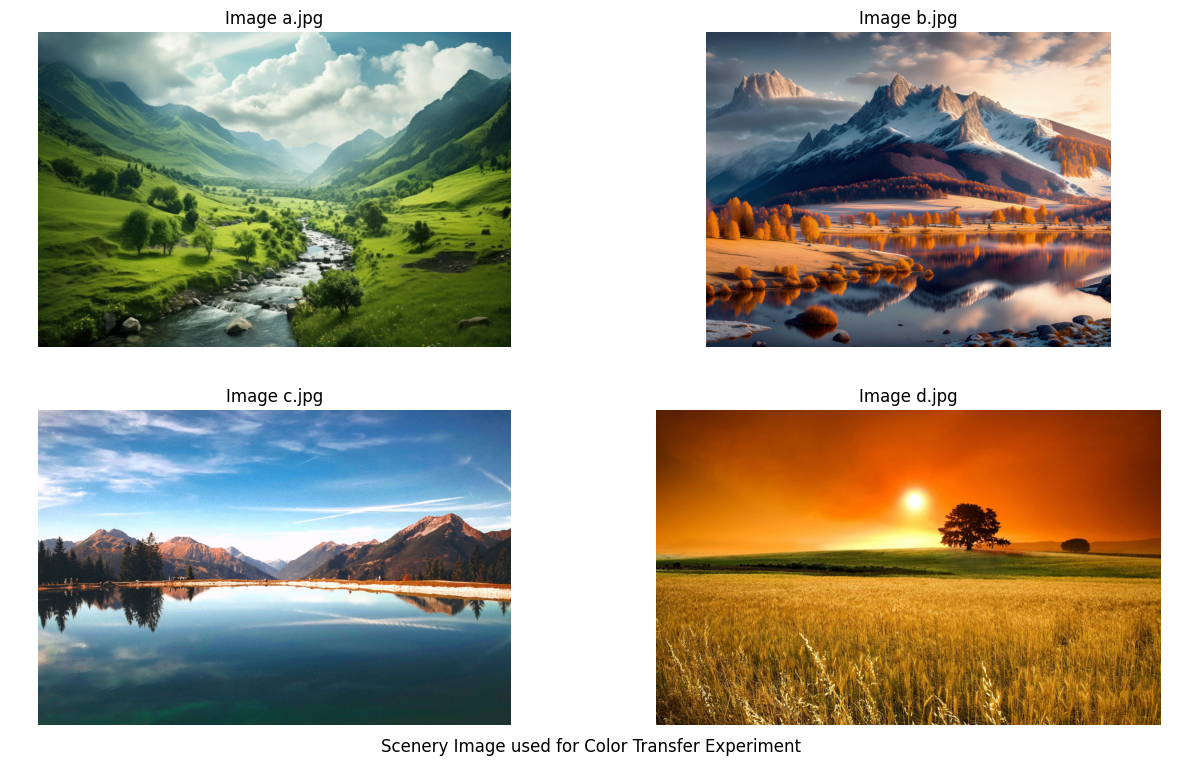

In [4]:
import os
from matplotlib import pyplot as plt
# Reinhard Color Transfer
# Initialize image used for experiment
scenery_image_path = "./image_folder/scenery/"
image_name = ['a.jpg','b.jpg','c.jpg','d.jpg']
num_images = len(image_name)
num_rows = 2
num_cols = 2

plt.figure(figsize=(15, 9)) 
plt.axis('off') 
plt.title("Scenery Image used for Color Transfer Experiment",y=-0.05)
for i in range(num_images):
    image = cv2.imread(scenery_image_path + image_name[i])
    #image = cv2.resize(image, (256, 256), interpolation = cv2.INTER_AREA)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image "+image_name[i])
    plt.axis('off') 
    
plt.show()

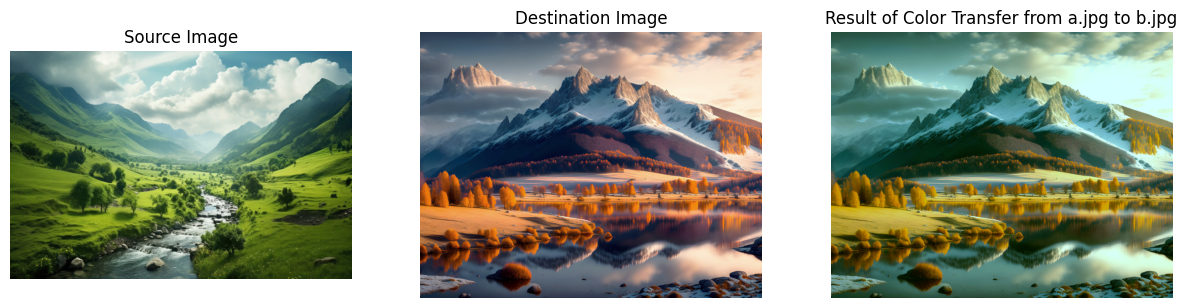

In [5]:
# Perform color transfer on source:a.jpg and destination:b.jpg
source_path = "./image_folder/scenery/a.jpg"
dest_path = "./image_folder/scenery/b.jpg"
source = cv2.imread(source_path)
destination = cv2.imread(dest_path)


plt.figure(figsize=(15, 9)) 
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.title("Source Image")
plt.axis('off') 

 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(destination, cv2.COLOR_BGR2RGB))
plt.title("Destination Image")
plt.axis('off') 

result_img = color_transfer_method(source, destination)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Result of Color Transfer from a.jpg to b.jpg")
plt.axis('off') 
plt.show()

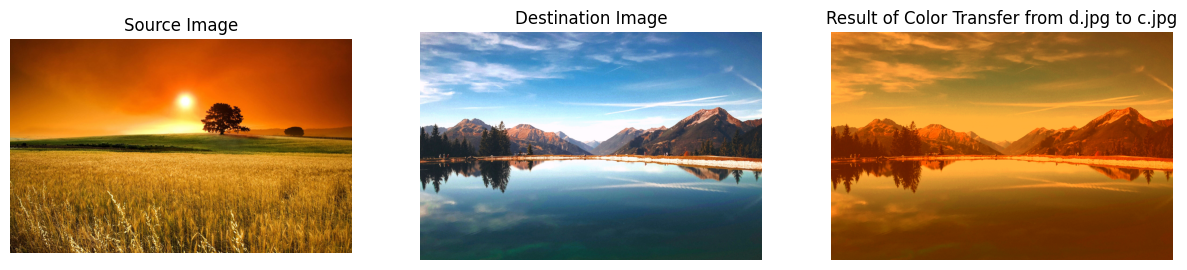

In [6]:
# Perform color transfer on source:a.jpg and destination:b.jpg
source_path = "./image_folder/scenery/d.jpg"
dest_path = "./image_folder/scenery/c.jpg"
source = cv2.imread(source_path)
destination = cv2.imread(dest_path)


plt.figure(figsize=(15, 9)) 
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.title("Source Image")
plt.axis('off') 

 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(destination, cv2.COLOR_BGR2RGB))
plt.title("Destination Image")
plt.axis('off') 

result_img = color_transfer_method(source, destination)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Result of Color Transfer from d.jpg to c.jpg")
plt.axis('off') 
plt.show()

### Semantic Segmentation Experiment
------
Model Used:
1. BiSeNet
~~2. SCANet~~

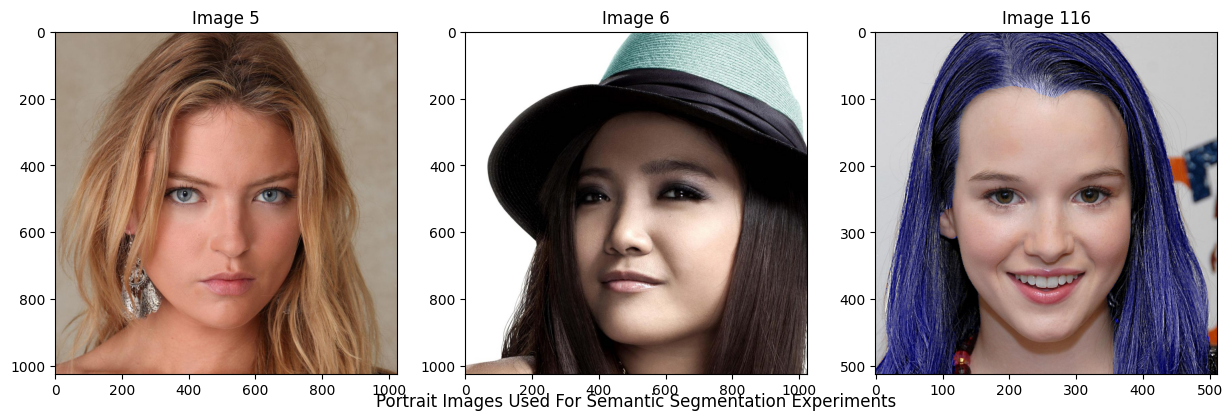

In [7]:
image_path = "./image_folder/test-img/"
anno_path = "./image_folder/anno_mask_img/"
image_name = ['5','6','116']
num_images = len(image_name)
num_rows = 1
num_cols = 3

plt.figure(figsize=(15, 5)) 
plt.axis('off') 
plt.title("Portrait Images Used For Semantic Segmentation Experiments",y=-0.05)
for i in range(num_images):
    image = cv2.imread(image_path + image_name[i] + '.jpg')
    #image = cv2.resize(image, (256, 256), interpolation = cv2.INTER_AREA)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image "+image_name[i])
    #plt.axis('off') 
    
plt.show()

In [8]:
# Run the model to do facial features semantic segmentation on all images in the dspth
evaluate_bisenet(respth = './image_folder/anno_mask_img/', dspth = './image_folder/test-img/', cp='79999_iter.pth')

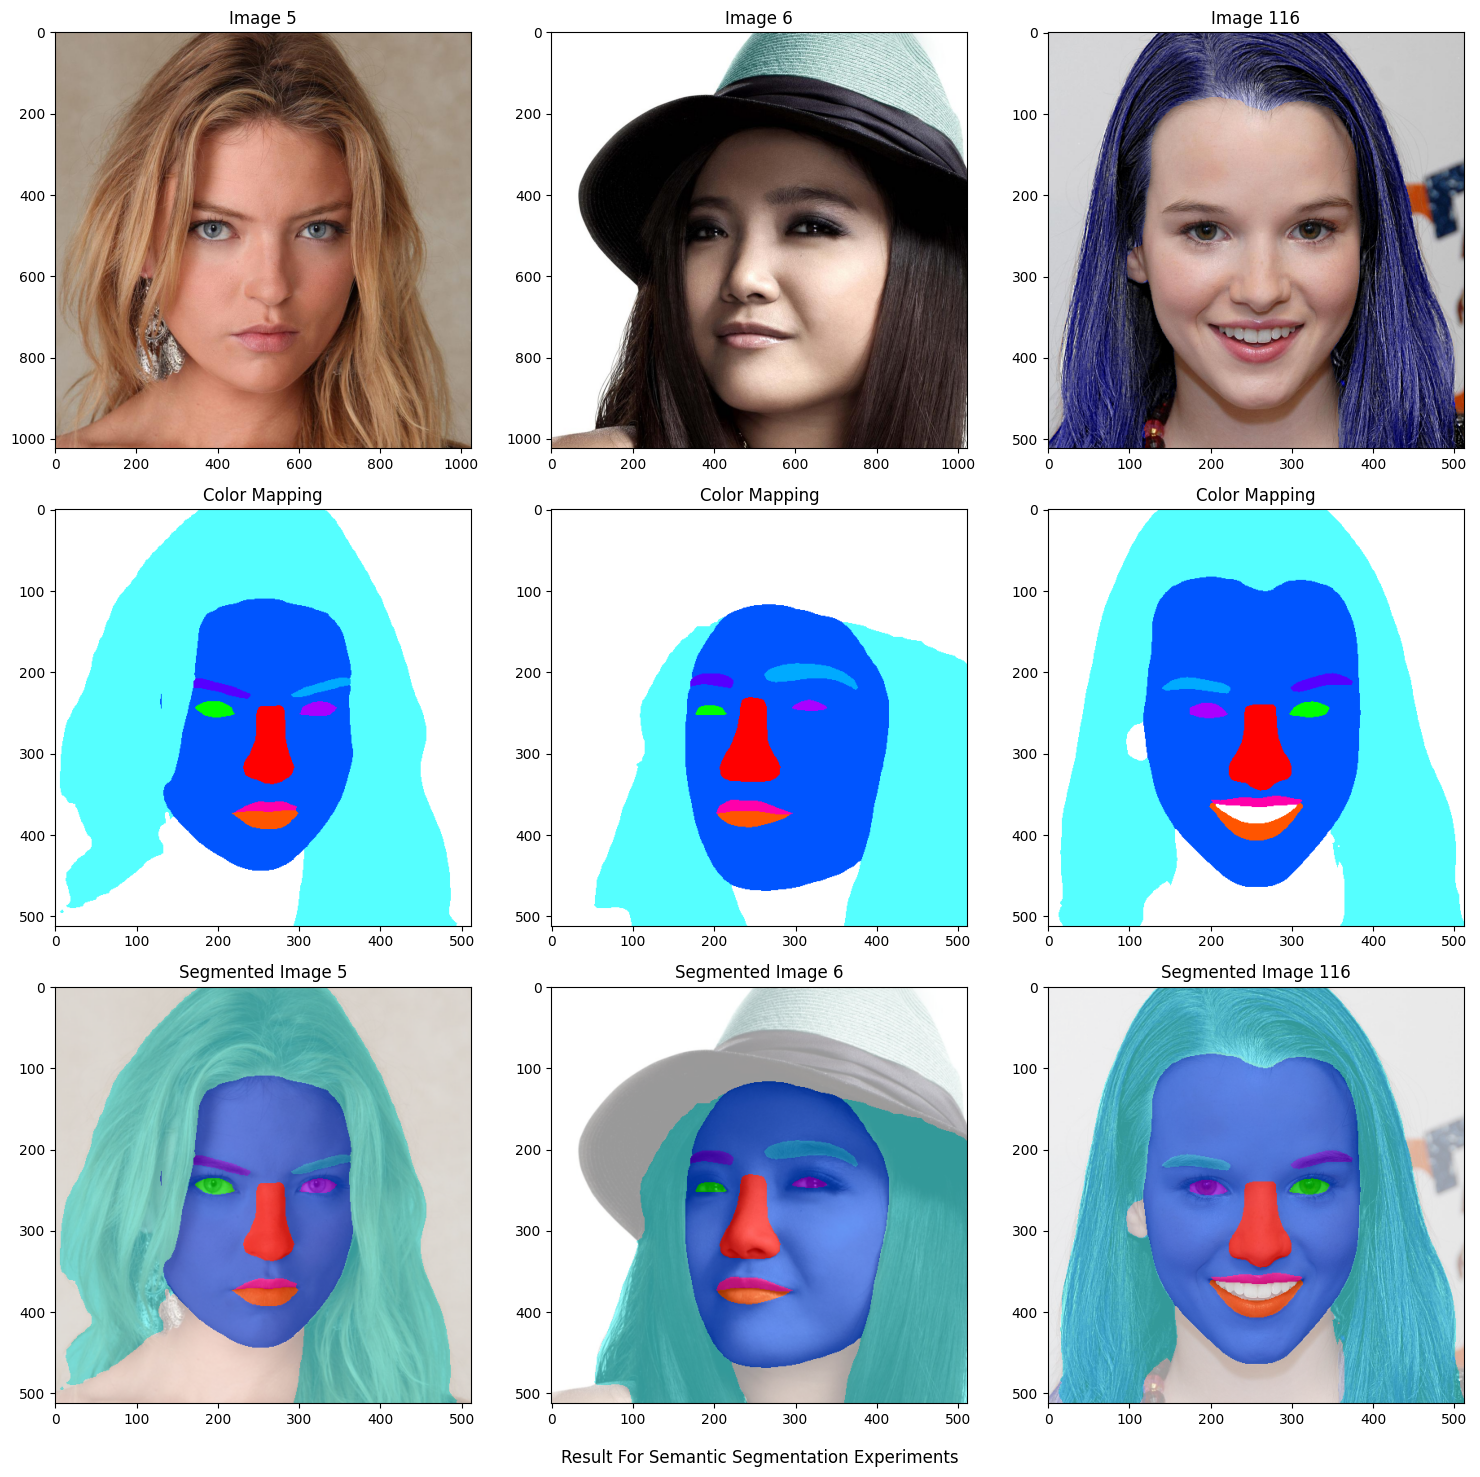

In [9]:
image_path = "./image_folder/test-img/"
anno_path = "./image_folder/anno_mask_img/"
image_name = ['5','6','116']
num_images = len(image_name)
num_rows = 3
num_cols = 3
plt.figure(figsize=(15, 5 * num_rows)) 
plt.axis('off') 
plt.title("Result For Semantic Segmentation Experiments",y=-0.05)
for i in range(num_images):
    image = cv2.imread(image_path + image_name[i] + '.jpg')
    #image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image "+image_name[i])
   # plt.axis('off') 
    
    image = cv2.imread(anno_path + image_name[i] + '_anno.png')
    #image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
    plt.subplot(num_rows, num_cols, i + 4)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Color Mapping")
    #plt.axis('off') 
    
    image = cv2.imread(anno_path + image_name[i] + '_segmented.png')
    #image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
    plt.subplot(num_rows, num_cols, i + 7)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image "+image_name[i])
   # plt.axis('off') 
plt.tight_layout()
plt.show()

### Digital Makeup Experiment
------
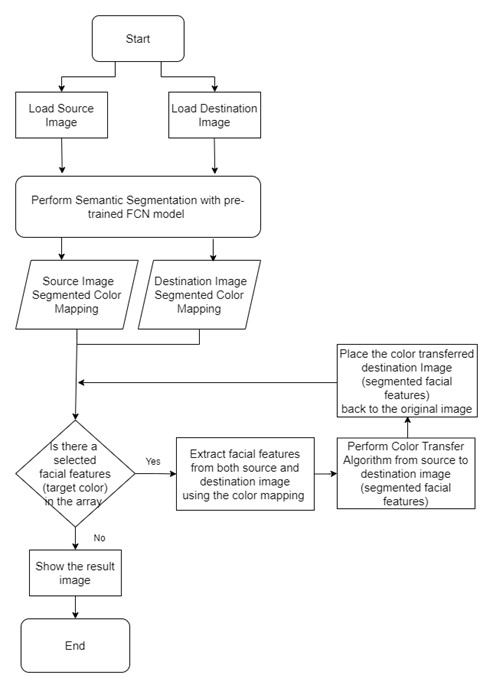

In [10]:
# Variables
anno_mask_path = './image_folder/anno_mask_img/'
img_folder_path = './image_folder/test-img/'
crop_save_path = './image_folder/crop_facial_parts/'
res_save_path = './image_folder/res-img/result.png'
source_img_name = 'b' 
dest_img_name = 'a'

target_color = [ [255,255,85], ]

# Source Image
src_img = cv2.imread(img_folder_path + source_img_name + '.jpg')
# Destination Image
img = cv2.imread(img_folder_path + dest_img_name + '.jpg')
dest_img = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)

(-0.5, 243.5, 371.5, -0.5)

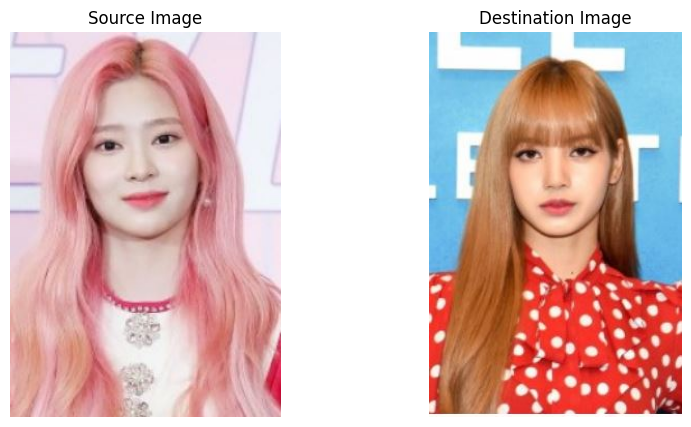

In [11]:
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.title("Source Image")
plt.axis('off') 

 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Destination Image")
plt.axis('off')

In [12]:
# Run evaluate function to get all of the facial segmentation color mapping of the pictures in the dspth folder 
evaluate_bisenet(respth = anno_mask_path, dspth = img_folder_path, cp = '79999_iter.pth')
# evaluate_scanet(respth = anno_mask_path, dspth = img_folder_path, cp='best_256.onnx')

In [13]:
# For each facial features (based on target color)
for facial_anno_color in target_color:

    # Crop out facial features of SOURCE image
    source = crop(img_name = source_img_name, img_path = img_folder_path, anno_path = anno_mask_path,  save_path = crop_save_path + 'source.png', target_color = facial_anno_color)
    # Crop out facial features of DEST image
    dest = crop(img_name = dest_img_name, img_path = img_folder_path, anno_path = anno_mask_path,  save_path = crop_save_path + 'dest.png', target_color = facial_anno_color)

    # Perform Color Transfer
    result_img_parts = color_transfer_method(source_img=source,dest_img=dest)

    # Merge color transferred facial features back to the dest image
    dest_img = merge(img = dest_img, img_parts = result_img_parts, img_anno_path = anno_mask_path + dest_img_name + '_anno.png', result_save_path = res_save_path, target_color = facial_anno_color)


    

Text(0.5, 1.0, 'Result Image')

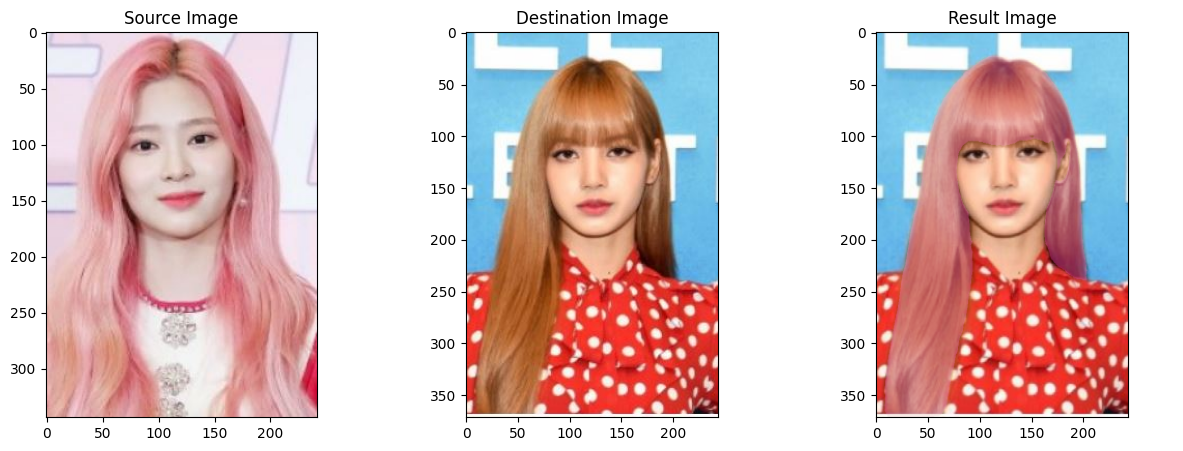

In [14]:
# # For showing initial source and dest img

plt.figure(figsize=(15, 5)) 
plt.title("Result of Digital Makeup",y=-0.01)
plt.axis('off') 

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
plt.title("Source Image")
#plt.axis('off') 

 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Destination Image")
#plt.axis('off')

plt.subplot(1, 3, 3)
dest_img = cv2.resize(dest_img, (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA) 
plt.imshow(cv2.cvtColor(dest_img, cv2.COLOR_BGR2RGB))
plt.title("Result Image")
#plt.axis('off')